In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('youtube_channel_real_performance_analytics.csv')

In [3]:
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [5]:
df.isnull().sum()

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

In [6]:
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

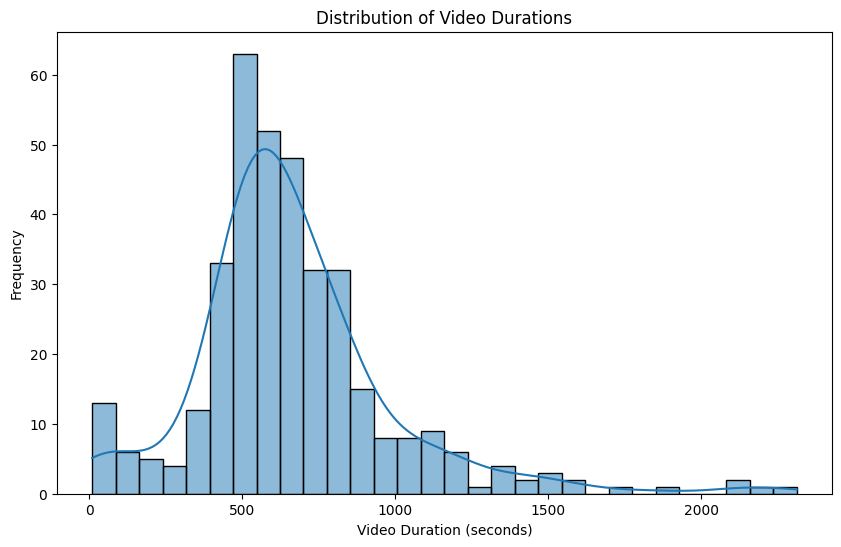

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Video Duration'], bins=30, kde=True)
plt.title('Distribution of Video Durations')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

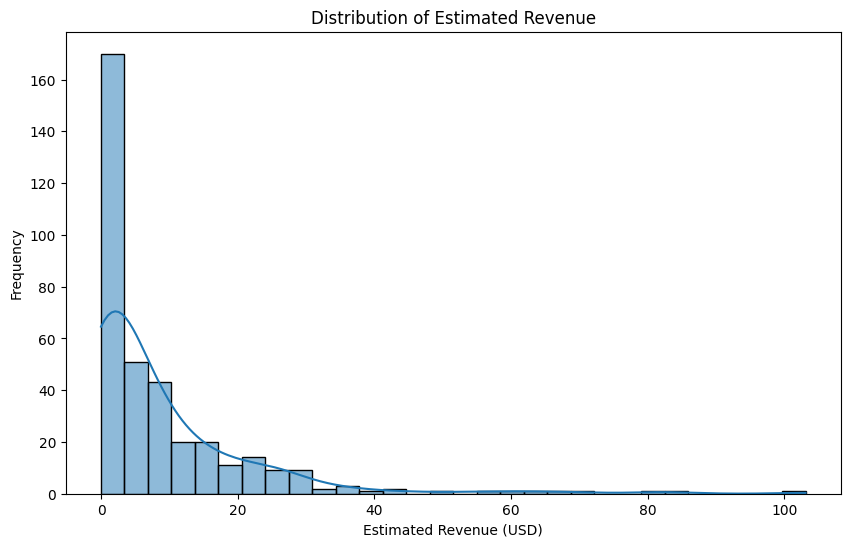

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Revenue (USD)'], bins=30, kde=True)
plt.title('Distribution of Estimated Revenue')
plt.xlabel('Estimated Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

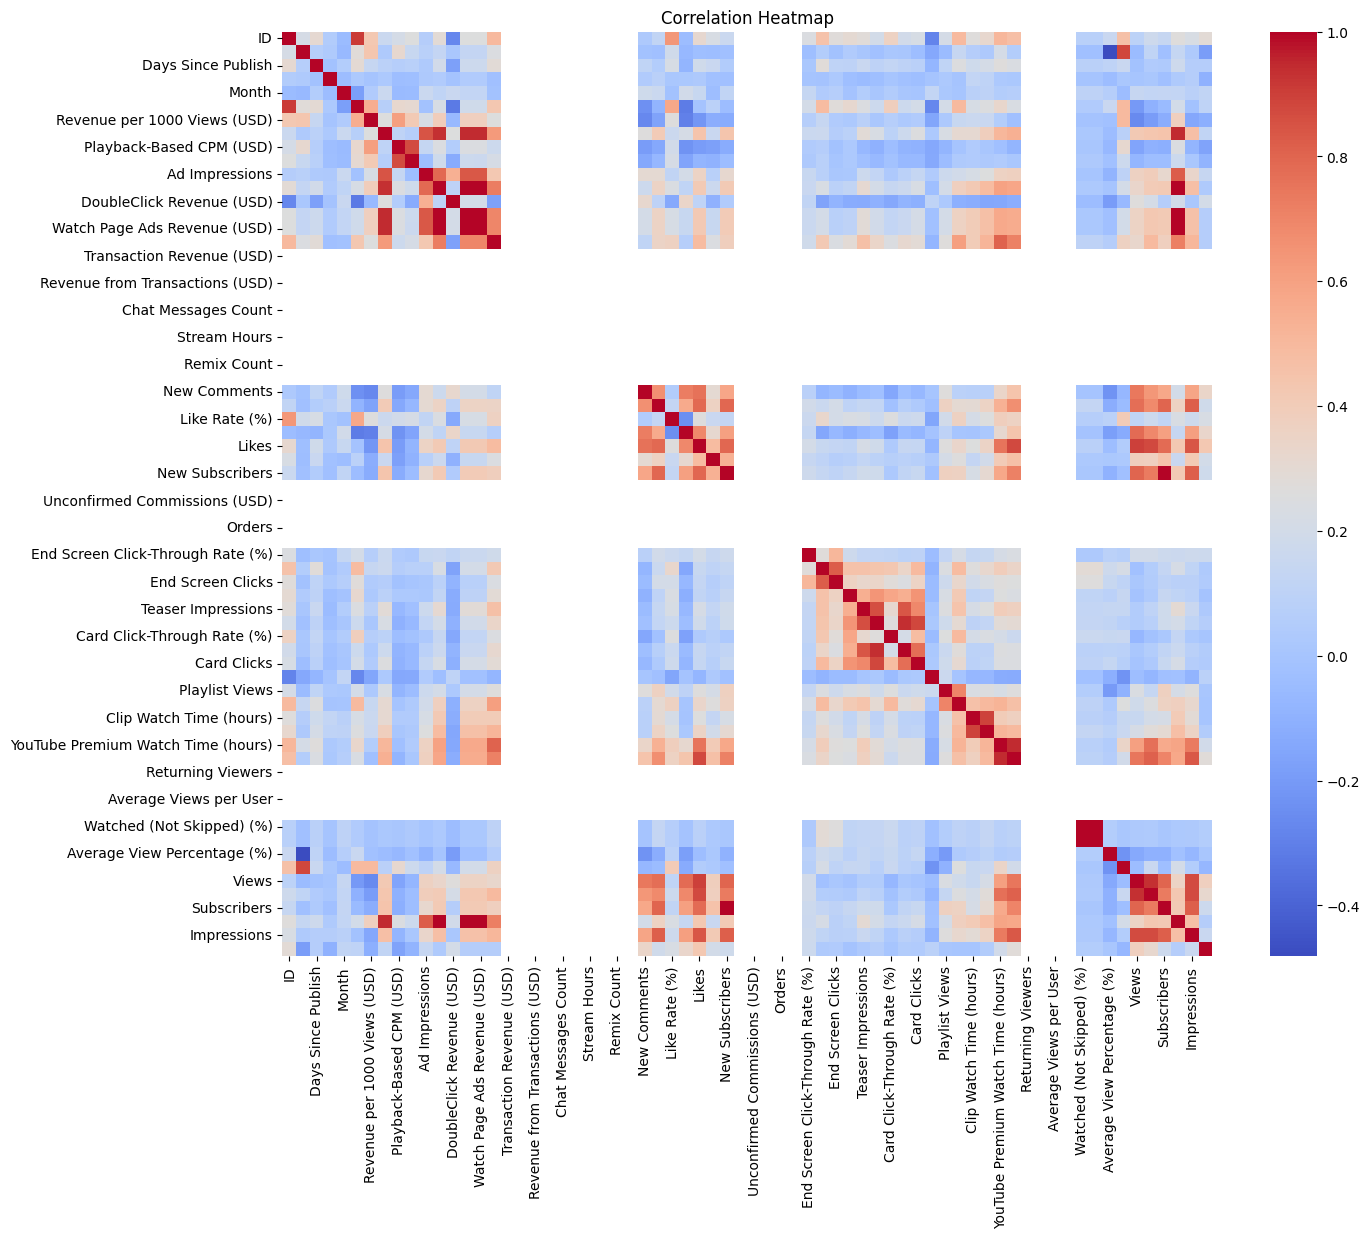

In [9]:
numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

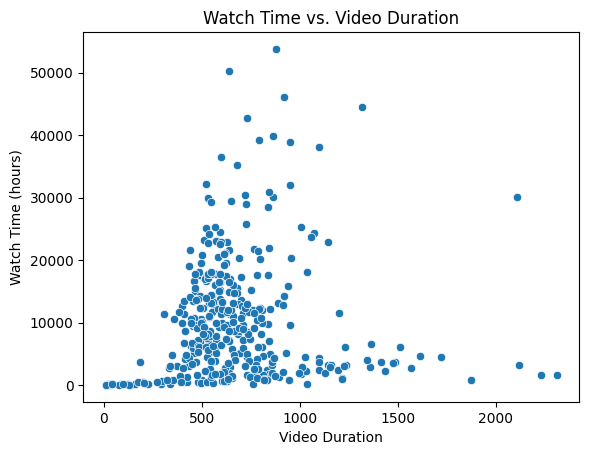

In [10]:
sns.scatterplot(x='Video Duration', y='Watch Time (hours)', data=df)
plt.title("Watch Time vs. Video Duration")
plt.show()

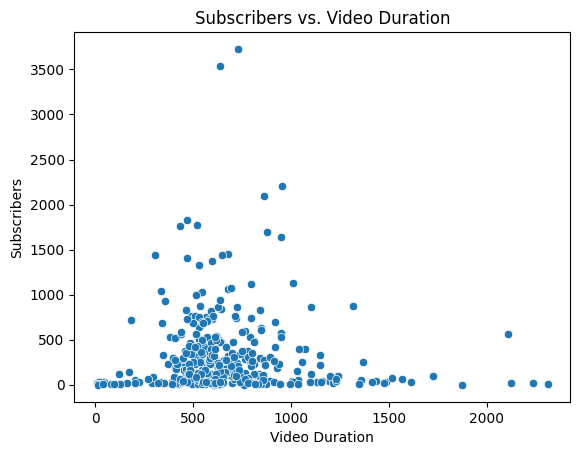

In [11]:
sns.scatterplot(x='Video Duration', y='Subscribers', data=df)
plt.title("Subscribers vs. Video Duration")
plt.show()

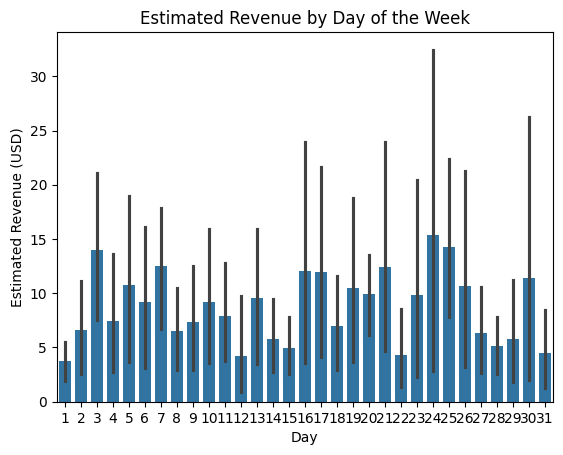

In [12]:
sns.barplot(x='Day', y='Estimated Revenue (USD)', data=df)
plt.title("Estimated Revenue by Day of the Week")
plt.show()

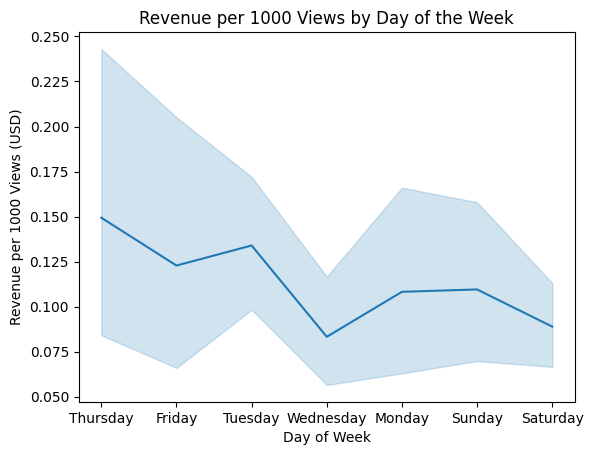

In [13]:
sns.lineplot(x='Day of Week', y='Revenue per 1000 Views (USD)', data=df)
plt.title("Revenue per 1000 Views by Day of the Week")
plt.show()

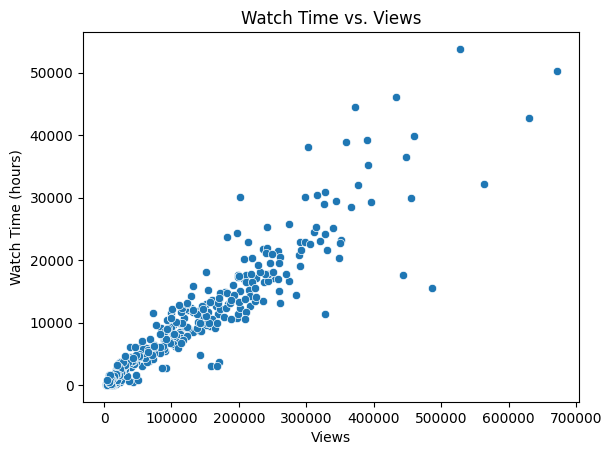

In [14]:
sns.scatterplot(x='Views', y='Watch Time (hours)', data=df)
plt.title("Watch Time vs. Views")
plt.show()

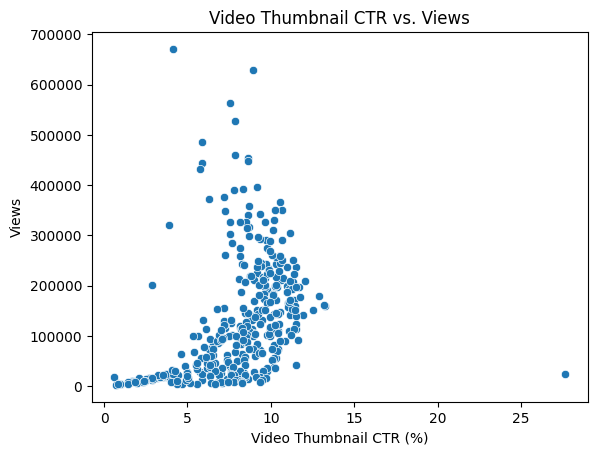

In [15]:
sns.scatterplot(x='Video Thumbnail CTR (%)', y='Views', data=df)
plt.title("Video Thumbnail CTR vs. Views")
plt.show()

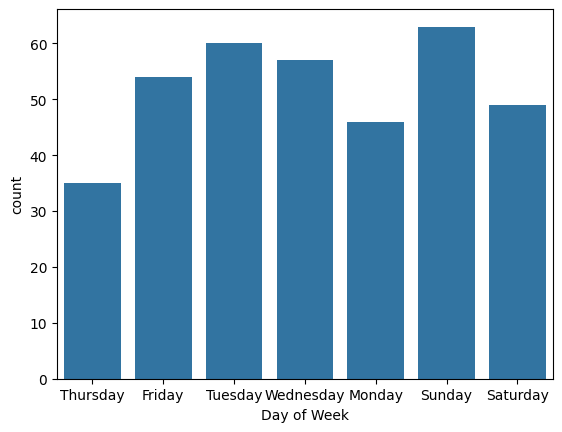

In [16]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x=col,data=df)
        plt.show()

In [17]:
df['Video Duration (Minutes)'] = df['Video Duration'] / 60
df.groupby(df['Video Duration (Minutes)'])['Subscribers'].sum().reset_index().head()

,Video Duration (Minutes),Subscribers
0,0.150000,4.0
1,0.183333,14.0
2,0.200000,1.0
3,0.233333,7.0
4,0.250000,2.0


Text(0.5, 1.0, 'Video Duration relation with Subscribers')

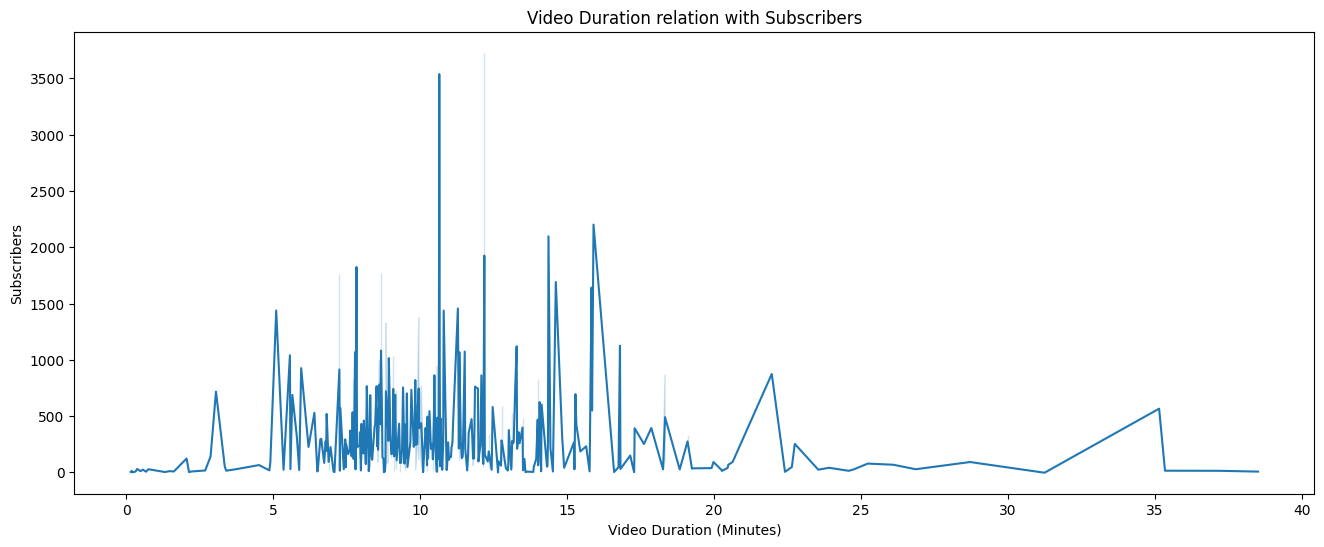

In [18]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df,x='Video Duration (Minutes)',y='Subscribers') 
plt.title('Video Duration relation with Subscribers') 

In [19]:
df2 = df.groupby(['Day', 'Day of Week'])['Estimated Revenue (USD)'].mean().reset_index()
df2 = df2[df2['Estimated Revenue (USD)'] > 0].dropna(subset=['Estimated Revenue (USD)'])
df2.head(14)

,Day,Day of Week,Estimated Revenue (USD)
0,1,Friday,5.145667
1,1,Monday,0.489500
2,1,Saturday,2.883000
3,1,Sunday,5.232667
4,1,Thursday,5.934000
5,1,Wednesday,2.921000
6,2,Friday,1.243000
7,2,Monday,4.355000
8,2,Saturday,18.619500
9,2,Sunday,10.108000


In [20]:
import plotly.express as py
import nbformat

fig = py.sunburst(
    df2,
    path=['Day', 'Day of Week'],  
    values='Estimated Revenue (USD)', 
    title='Average Estimated Revenue by Day and Day of Week',
    color='Day', 
)

fig.show()